In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

plt.style.use('bmh')

In [2]:
data = pd.read_csv('../ts_data/example_wp_log_peyton_manning.csv', parse_dates=['ds'])
data 

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [3]:
m = Prophet()
m.fit(data)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7975.41    0.00109841       326.358      0.7019      0.7019      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7990.03    0.00870456       663.895      0.4236      0.4236      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        7994.7    0.00088867       189.435       2.393      0.2393      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7999.23   0.000490727       311.727       0.255           1      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     431       8000.37   3.72506e-05       109.303   1.977e-07       0.001      577  LS failed, Hessian reset 
     499       8001.34    0.00358046    

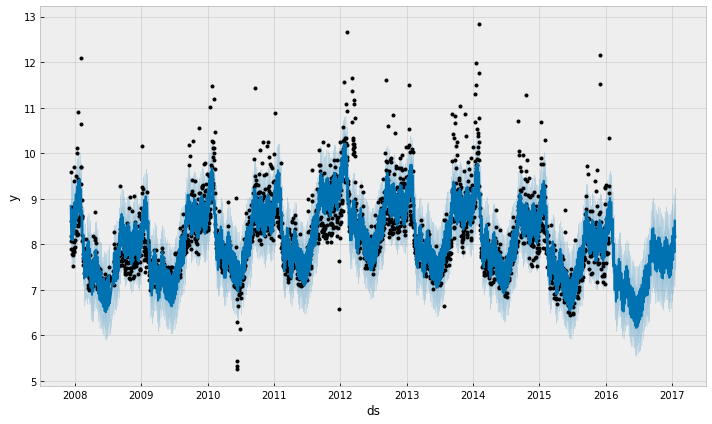

In [4]:
fig = m.plot(forecast)
plt.show()

In [5]:
# add changepoints to plot
a = add_changepoints_to_plot(fig.gca(), m, forecast)

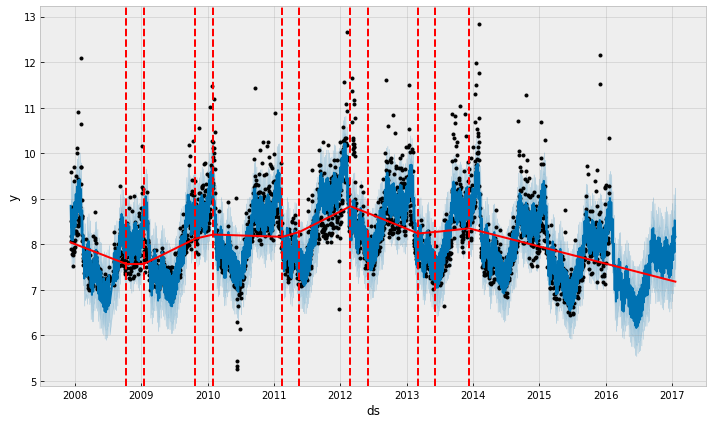

In [6]:
fig

## Adjusting trend flexibility

In [7]:
# changepoint.prior.scale --> higher = more flexible

m1 = Prophet(changepoint_prior_scale=0.5)
m1.fit(data)
forecast1 = m1.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8043.87   0.000993641       388.696           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8068.12    0.00118687       267.256           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8092.08    0.00395915       676.811      0.2095      0.2095      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8103.11     0.0164377       419.878           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8120.37    0.00714211       318.551      0.4394           1      575   
    Iter      log prob        ||dx||      ||grad||       alpha  

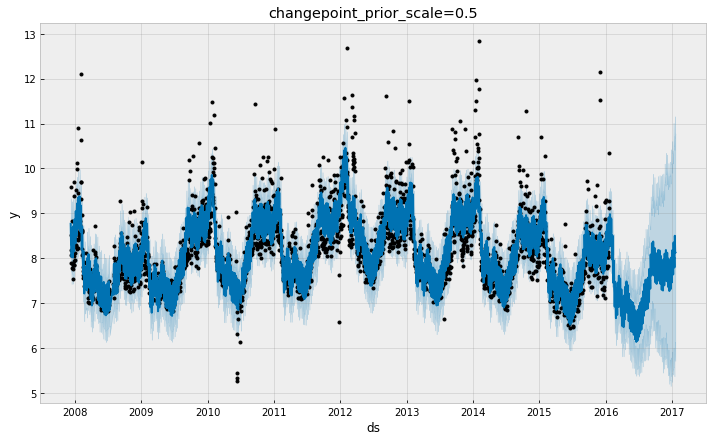

In [8]:
m1.plot(forecast1)
plt.title("changepoint_prior_scale=0.5")
plt.show()

In [9]:
m2 = Prophet(changepoint_prior_scale=0.001)
m2.fit(data)
forecast2 = m2.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      55        7632.2   0.000726133       3915.52   1.743e-07       0.001      113  LS failed, Hessian reset 
      99       7634.95   5.93231e-06       4345.59      0.3135           1      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       7634.96   1.70843e-07       3480.27   4.614e-11       0.001      267  LS failed, Hessian reset 
     151       7634.96   7.88262e-09       3388.17       0.444       0.396      282   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


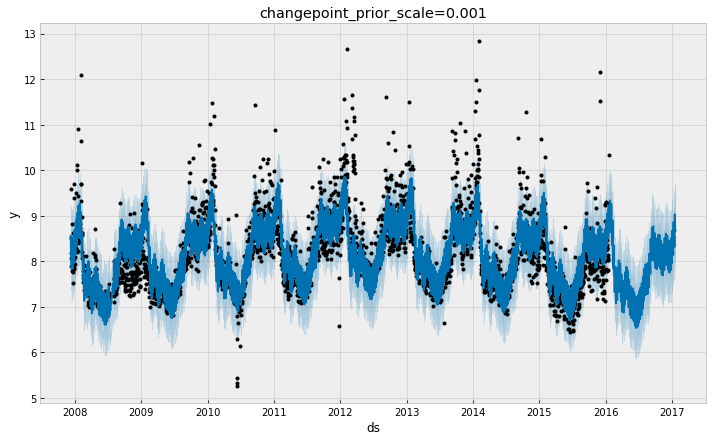

In [10]:
m2.plot(forecast2)
plt.title("changepoint_prior_scale=0.001")
plt.show()